# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [187]:
import pandas as pd

data = pd.read_csv('spam_or_not_spam.csv', header=0, sep=',')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [188]:
data.groupby('label').count()

,email
label,
0,2500
1,499


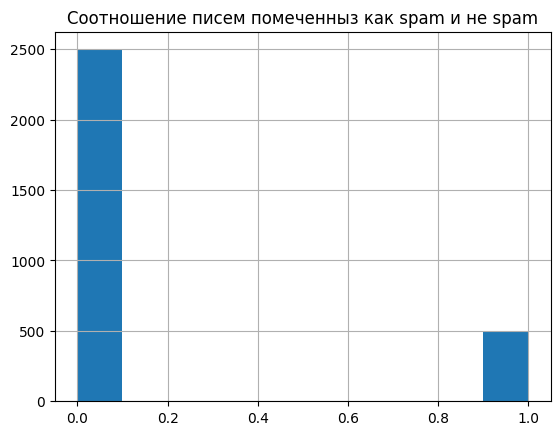

In [189]:
# визуализируйте результат: ваш код здесь
import matplotlib.pyplot as plt

#plt.figure(figsize=(8,4))
data['label'].hist()
plt.title('Соотношение писем помеченныз как spam и не spam');


## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [191]:
import numpy as np

data = data.replace(r'^\s+$', np.nan, regex=True)
data = data.dropna()

Переводим данные в векторный вид:

In [192]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [193]:
display(X.shape)

(2997, 34116)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [194]:
from sklearn import model_selection

y = data["label"]

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [195]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [196]:
print('Cреднее значение целевой переменной по тестовой выборке:', round(y_test.mean(), 3))

Cреднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [197]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB

clf =  MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

Accuracy: 0.987
Recall: 0.919
F1: 0.958
Precision: 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           1       1.00      0.92      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



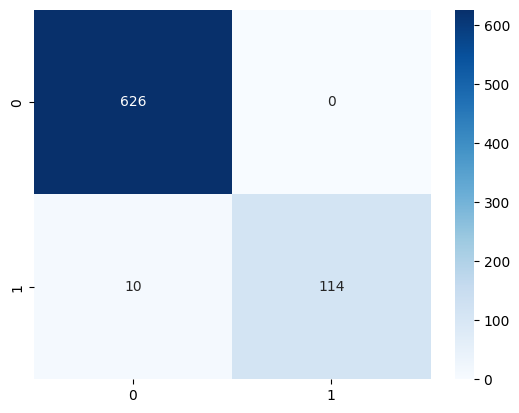

In [198]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(f"Accuracy: {round(accuracy_score(y_test, y_test_pred),3)}")
print(f"Recall: {round(recall_score(y_test, y_test_pred),3)}")
print(f"F1: {round(f1_score(y_test, y_test_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_test_pred),3)}")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
print(classification_report(y_test, y_test_pred))

Нарисуйте ROC-кривую:

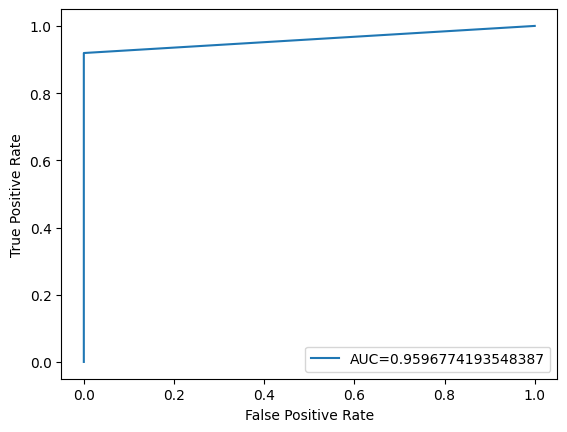

In [199]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [200]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB

param_distributions = {'alpha': list(np.linspace(0.001, 1, 1000, dtype=float)) }
            
grid_search_nb = GridSearchCV(
    estimator = MultinomialNB(), 
    param_grid=param_distributions, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_nb.fit(X_train, y_train) 
y_test_pred = grid_search_nb.predict(X_test)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Precision на тестовом наборе: {:.3f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.3f}'.format(metrics.recall_score(y_test, y_test_pred)))
print(f"Accuracy: {round(accuracy_score(y_test, y_test_pred),3)}")
print("Наилучшие значения гиперпараметров: {}".format(grid_search_nb.best_params_))


CPU times: user 1.57 s, sys: 56.2 ms, total: 1.62 s
Wall time: 20.6 s
f1_score на тестовом наборе: 0.975
Precision на тестовом наборе: 0.992
Recall на тестовом наборе: 0.960
Accuracy: 0.992
Наилучшие значения гиперпараметров: {'alpha': 0.081}
